<a href="https://colab.research.google.com/github/baricio00/Health-Informatics-2025-26/blob/main/log1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection

df = pd.read_csv('rotterdam.csv')

num_vars = ["year", "age", "nodes", "pgr", "er", "rtime", "dtime"]
cat_vars = ["hospital_id", "meno", "size", "grade", "hormon", "chemo", "recur"]

selected_features = ['age','year','nodes','er','pgr', 'size', 'grade', 'meno', 'hormon', 'chemo', 'recur'];
df1 = df[selected_features];

In [36]:
df1['size'] = df1['size'].replace({'20-50': '>20', '>50': '>20'});

def categorize_nodes(nodes):
    if nodes == 0:
        return '0'
    elif 1 <= nodes <= 3:
        return '1-3'
    elif 4 <= nodes <= 9:
        return '4-9'
    else: # nodes >= 10
        return '>10'
    
def categorize_er(er):
    if er <= 10:
        return '<= 10'
    else:
        return '>10'
    
def categorize_pgr(pgr):
    if pgr <= 10:
        return '<= 10'
    else:
        return '>10'

df1['nodes'] = df1['nodes'].apply(categorize_nodes);
df1['er'] = df1['er'].apply(categorize_er);
df1['pgr'] = df1['pgr'].apply(categorize_pgr);

cat_var_df1=['meno','hormon','chemo','recur','size','grade', 'nodes', 'er','pgr'];
num_var_df1=['age','year'];

C:\Users\ricca\AppData\Local\Temp\ipykernel_24372\3533829037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size'] = df1['size'].replace({'20-50': '>20', '>50': '>20'});
C:\Users\ricca\AppData\Local\Temp\ipykernel_24372\3533829037.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nodes'] = df1['nodes'].apply(categorize_nodes);
C:\Users\ricca\AppData\Local\Temp\ipykernel_24372\3533829037.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [37]:
df1

,age,year,nodes,er,pgr,size,grade,meno,hormon,chemo,recur
0,74,1992,0,>10,>10,<=20,3,1,0,0,0
1,79,1984,0,>10,>10,>20,3,1,0,0,0
2,44,1983,0,<= 10,>10,<=20,2,0,0,0,1
3,70,1985,0,>10,<= 10,>20,3,1,0,0,0
4,75,1983,0,>10,>10,<=20,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2977,73,1990,1-3,>10,>10,>20,3,1,0,0,1
2978,75,1987,>10,>10,<= 10,>20,3,1,1,0,1
2979,79,1985,4-9,>10,>10,>20,3,1,0,0,0
2980,71,1983,0,>10,<= 10,<=20,3,1,0,0,0


In [38]:
X=df1.drop('recur',axis=1)
y=df1['recur']

X=sm.add_constant(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)
train_index = X_train.index
test_index = X_test.index


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [39]:
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

numeric_vars = num_var_df1.copy()
categorical_vars = cat_var_df1.copy()
categorical_vars.remove('recur')

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
n = len(y_test)

In [40]:
X_train_processed = pd.DataFrame(X_train_proc, columns=feature_names, index=X_train.index)
X_train_processed = sm.add_constant(X_train_processed, prepend=True) # Add constant as the first column

logit_model = sm.Logit(y_train, X_train_processed).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.615530
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  recur   No. Observations:                 2385
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           12
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                  0.1118
Time:                        11:47:25   Log-Likelihood:                -1468.0
converged:                       True   LL-Null:                       -1652.8
Covariance Type:            nonrobust   LLR p-value:                 1.021e-71
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1487      0.170     -6.756      0.000      -1.482      -0.815
num__age         

Odds ratio:

In [41]:
coef = logit_model.params
odds_ratios = np.exp(coef) # e^coef

conf = logit_model.conf_int()
conf.columns = ['2.5%', '97.5%']
conf = np.exp(conf)  # Exponentiate the betas' CIs to get ORs' CIs

or_summary = pd.DataFrame({
    "Coefficient": coef,
    "Odds Ratio": odds_ratios,
    "2.5% CI OR": conf['2.5%'],
    "97.5% CI OR": conf['97.5%']
})

print(or_summary)

                Coefficient  Odds Ratio  2.5% CI OR  97.5% CI OR
const             -1.148715    0.317044    0.227192     0.442430
num__age          -0.315976    0.729077    0.626480     0.848475
num__year         -0.011980    0.988091    0.900792     1.083851
cat__meno_1        0.033247    1.033806    0.763591     1.399643
cat__hormon_1     -0.607293    0.544824    0.387737     0.765551
cat__chemo_1      -0.442084    0.642696    0.467895     0.882800
cat__size_>20      0.512141    1.668861    1.388918     2.005227
cat__grade_3       0.641787    1.899873    1.549040     2.330164
cat__nodes_1-3     0.543578    1.722158    1.296390     2.287760
cat__nodes_4-9     1.213653    3.365758    2.522772     4.490428
cat__nodes_>10     2.589625   13.324776    8.275034    21.456062
cat__er_>10        0.099694    1.104832    0.859128     1.420807
cat__pgr_>10      -0.171879    0.842081    0.666416     1.064051


Odds ratio plot:

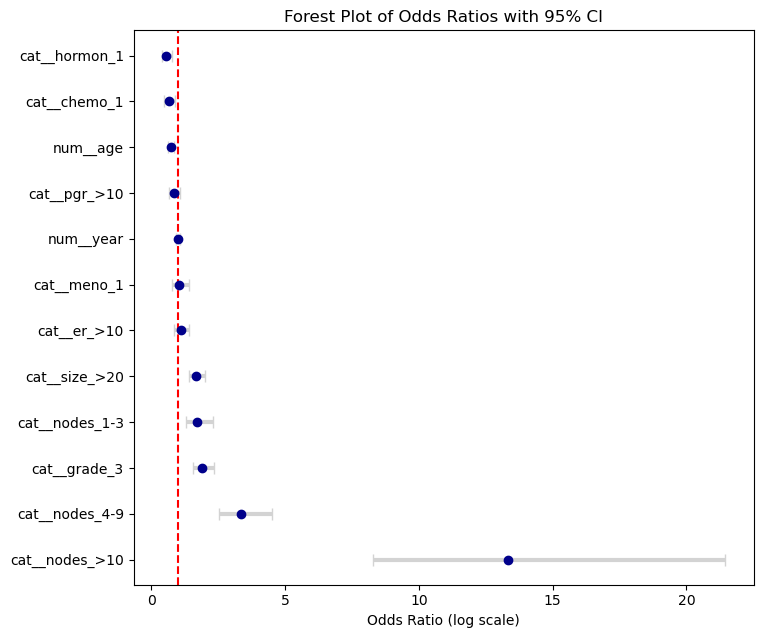

In [42]:
# Sort by odds ratio for better visualization
or_summary = or_summary.sort_values(by="Odds Ratio", ascending=False)

or_summary = or_summary.drop('const')

fig, ax = plt.subplots(figsize=(8, len(or_summary) * 0.6))

# Plot the OR as points with confidence intervals
ax.errorbar(or_summary['Odds Ratio'], or_summary.index,
            xerr=[or_summary['Odds Ratio'] - or_summary['2.5% CI OR'], or_summary['97.5% CI OR'] - or_summary['Odds Ratio']],
            fmt='o', color='darkblue', ecolor='lightgray', elinewidth=3, capsize=4)

# Add a vertical line at OR = 1 (meaning no effect)
ax.axvline(1, color='red', linestyle='--')

ax.set_xlabel("Odds Ratio (log scale)")
ax.set_title("Forest Plot of Odds Ratios with 95% CI")
#ax.set_xscale("log")  # Log scale is sometimes useful for better visualization

plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cat_var_df1.copy()

X_train_2 = X_train[variables]
X_test_2 = X_test[variables]
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)


vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_2.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]

print(vif_data)

KeyError: "['recur'] not in index"

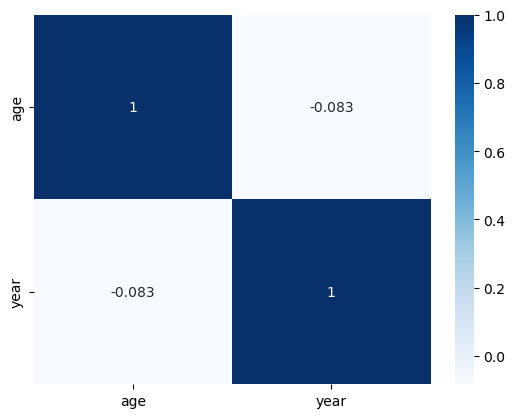

In [32]:
sns.heatmap(df[variables].corr(), cmap="Blues",annot=True);

In [11]:
X_train_2 = X_train[variables]
X_test_2 = X_test[variables]

scaler = StandardScaler()
X_train_2_scaled = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns, index=X_train_2.index)
X_test_2_scaled = pd.DataFrame(scaler.transform(X_test_2), columns=X_test_2.columns, index=X_test_2.index)

X_train_2_scaled = sm.add_constant(X_train_2_scaled)
X_test_2_scaled = sm.add_constant(X_test_2_scaled)

model = sm.OLS(y_train, X_train_2_scaled)
results = model.fit()
print(results.summary())

KeyError: "['nodes'] not in index"

In [12]:
variables = ['age', 'nodes', 'pgr']

X_train_3 = X_train[variables]
X_test_3 = X_test[variables]
X_train_3 = sm.add_constant(X_train_3)
X_test_3 = sm.add_constant(X_test_3)

model = sm.OLS(y_train, X_train_3)
results = model.fit()
print(results.summary())

KeyError: "['nodes'] not in index"

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

X = df[['age','year','er','pgr', 'size', 'grade', 'meno', 'hormon', 'chemo', 'death']]
y = df['recur']

numeric_vars = num_vars.copy()
categorical_vars = cat_vars.copy()
categorical_vars.remove('recur')  # remove target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
n = len(y_test)

# Fit full logistic model
start = time.time()
logreg_full = LogisticRegression().fit(X_train_proc, y_train)
y_pred_full = logreg_full.predict(X_test_proc)
y_proba_full = logreg_full.predict_proba(X_test_proc)[:, 1]
logloss_full = log_loss(y_test, y_proba_full)
time_full = time.time() - start

def get_classification_metrics(y_true, y_prob, p, logloss_full):
    n = len(y_true)
    log_loss_model = log_loss(y_true, y_prob)
    ll = -log_loss(y_true, y_prob, normalize=False)
    aic = 2 * p - 2 * ll
    bic = p * np.log(n) - 2 * ll
    cp = (n * log_loss_model) / logloss_full - n + 2 * p
    return aic, bic, cp


logloss_full = log_loss(y_test, y_proba_full)
aic_full, bic_full, cp_full = get_classification_metrics(y_test, y_proba_full, X_train_proc.shape[1] + 1, logloss_full)


# Best Subset Selection
start = time.time()
efs = ExhaustiveFeatureSelector(LogisticRegression(), min_features=1, max_features=10,
                                scoring='accuracy', cv=5, n_jobs=-1)
efs.fit(X_train_proc, y_train)
best_subset_idx = list(efs.best_idx_)
model_best = LogisticRegression().fit(X_train_proc[:, best_subset_idx], y_train)
y_pred_best = model_best.predict(X_test_proc[:, best_subset_idx])
y_proba_best = model_best.predict_proba(X_test_proc[:, best_subset_idx])[:, 1]
time_best = time.time() - start
aic_best, bic_best, cp_best = get_classification_metrics(y_test, y_proba_best, len(best_subset_idx) + 1, logloss_full)


# Forward Selection
start = time.time()
sfs_forward = SequentialFeatureSelector(LogisticRegression(), direction='forward', scoring='accuracy', cv=5, n_jobs=-1)
sfs_forward.fit(X_train_proc, y_train)
fwd_index = sfs_forward.get_support()
model_fwd = LogisticRegression().fit(X_train_proc[:, fwd_index], y_train)
y_proba_fwd = model_fwd.predict_proba(X_test_proc[:, fwd_index])[:, 1]
time_fwd = time.time() - start
aic_fwd, bic_fwd, cp_fwd = get_classification_metrics(y_test, y_proba_fwd, sum(fwd_index) + 1, logloss_full)


# Backward Selection
start = time.time()
sfs_backward = SequentialFeatureSelector(LogisticRegression(), direction='backward', scoring='accuracy', cv=5, n_jobs=-1)
sfs_backward.fit(X_train_proc, y_train)
bwd_index = sfs_backward.get_support()
model_bwd = LogisticRegression().fit(X_train_proc[:, bwd_index], y_train)
y_proba_bwd = model_bwd.predict_proba(X_test_proc[:, bwd_index])[:, 1]
time_bwd = time.time() - start
aic_bwd, bic_bwd, cp_bwd = get_classification_metrics(y_test, y_proba_bwd, sum(bwd_index) + 1, logloss_full)

# Summary table
metrics_df = pd.DataFrame([
    {'Model': 'Full Logistic', 'AIC': aic_full, 'BIC': bic_full, 'Cp': cp_full, 'Time (s)': time_full},
    {'Model': 'Best Subset', 'AIC': aic_best, 'BIC': bic_best, 'Cp': cp_best, 'Time (s)': time_best},
    {'Model': 'Forward Selection', 'AIC': aic_fwd, 'BIC': bic_fwd, 'Cp': cp_fwd, 'Time (s)': time_fwd},
    {'Model': 'Backward Selection', 'AIC': aic_bwd, 'BIC': bic_bwd, 'Cp': cp_bwd, 'Time (s)': time_bwd}
])

# Selected features
features_df = pd.concat([
    pd.DataFrame({'Feature': feature_names[best_subset_idx], 'Method': 'Best Subset'}),
    pd.DataFrame({'Feature': feature_names[fwd_index], 'Method': 'Forward Selection'}),
    pd.DataFrame({'Feature': feature_names[bwd_index], 'Method': 'Backward Selection'})
])

# Output results
print("Logistic Regression Model Comparison:")
print(metrics_df)

print("\nSelected Features per Method:")
print(features_df)


ValueError: A given column is not a column of the dataframe